<a href="https://www.kaggle.com/code/manjitbaishya001/movie-reviews-sentiment-analysis-acc-0-85?scriptVersionId=194081028" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **💽 Movie Reviews Sentiment Analysis - ACC 0.85**
---
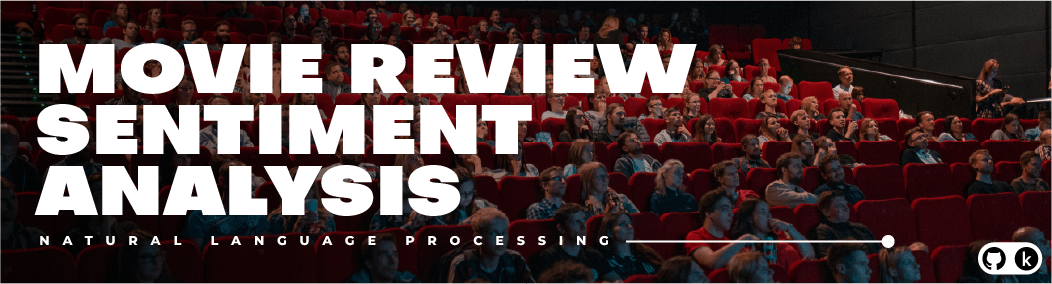
<br>
Movie review sentiment analysis is a process used to determine the overall emotional tone of movie reviews, classifying them as positive, negative, or neutral. By analyzing the text of reviews, sentiment analysis leverages natural language processing (NLP) techniques to detect patterns in word choice, syntax, and context that indicate the reviewer's sentiment. This analysis can help filmmakers, studios, and audiences gauge public perception of a movie, predict its success, and understand the aspects that contribute to its reception. With the growing volume of user-generated content online, sentiment analysis has become an essential tool for efficiently processing and interpreting large datasets of reviews, providing insights into audience preferences and market trends.

In [ ]:
# importing required libraries
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        src = os.path.join(dirname, filename)
        
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importing dataset
import numpy as np
import pandas as pd

df = pd.read_csv(src)
df.head()

# **⚙Data Preprocessing**

In [ ]:
# getting shape of the dataset
df.shape

In [ ]:
# getting dataset info
df.info()

## **⚡Setting Target**

In [ ]:
# getting unique values of the target
df['sentiment'].unique()

In [ ]:
# making sentiment as boolean values
df['sentiment'] = df['sentiment'].map({'positive':1, 'negative':0})
df.head()

## **🧵Lowercasing**

In [ ]:
# lowercasing the reviews
df['review'] = df['review'].str.lower()
df.head()

## **🧠Removing HTML Tags**

In [ ]:
# viewing HTML tags in the given entries
df['review'].iloc[1]

In [ ]:
from bs4 import BeautifulSoup

# removing HTML tags using BeautifulSoup
df['review'] = df['review'].apply(lambda x: BeautifulSoup(str(x), "html.parser").get_text())
df.head()

In [ ]:
# viewing entries after removing HTML tags
df['review'].iloc[1]

## **🍨Removing Non-Alphabetic Characters**

In [ ]:
df['review'] = df['review'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
df.head()

## **🗻Tokenization**

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    # Tokenize the text into words
    tokens = word_tokenize(text)
    return tokens

# Apply tokenization to the cleaned text
df['review'] = df['review'].apply(tokenize_text)
df.head()

## **📌Removing StopWords**

In [ ]:
from nltk.corpus import stopwords

nltk.download('stopwords')

# Define the set of stop words
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    # Remove stop words from the token list
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Apply stop words removal to the tokenized text
df['review'] = df['review'].apply(remove_stopwords)
df.head()

## **🧨Lemmatization**
Reduces words to their canonical form (lemmatization), so that variations of a word are treated as the same word.

In [ ]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_words(words):
    return [lemmatizer.lemmatize(word) for word in words]

# Apply lemmatization
df['review'] = df['review'].apply(lemmatize_words)
df.head()

## **🥎Rejoining into Sentences**

In [ ]:
df['review'] = df['review'].apply(lambda x: ' '.join(x))
df.head()

## **🛹Text to Features**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 1)
X = vectorizer.fit_transform(df['review'])

print(X[0])

## **🎓Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## **⚖Oversampling**

In [ ]:
y.value_counts()

# **⚓ML Modelling**

## **🧥Naive Baye's Classifier**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Creating an instance of Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Making predictions
nb_y_pred = nb_model.predict(X_test)

# Checking score
nb_accuracy = accuracy_score(y_test, nb_y_pred)

# Printing Classification Report
print(classification_report(y_test, nb_y_pred))

# Plotting Confusion Matrix (3x3 size)
cm = confusion_matrix(y_test, nb_y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **🎇Testing Model**

## **🎟Designing the Pipeline**

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

def pre_process(review):
    # Convert to lowercase
    review = review.lower()
    
    # Remove punctuation and non-alphabetic characters using regex
    review = re.sub(r'[^\w\s]', '', review)
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    
    # Tokenize (split the text into words)
    review = review.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    review = [word for word in review if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    review = [lemmatizer.lemmatize(word) for word in review]
    
    # Rejoin the tokens into a single string
    review = ' '.join(review)
    
    return review

def predict(review):
    # Pre-process the input review
    review = pre_process(review)

    # Transform the review using the already fitted vectorizer
    review_vector = vectorizer.transform([review])  # Note: transform, not fit_transform

    # Predict the label using the Extra Trees model
    y_pred = nb_model.predict(review_vector)
    
    if y_pred == 1:
        return 'Good 👍'
    else:
        return 'Bad 👎'

## **👞Testing with Reviews**

In [ ]:
# Sample movie reviews
reviews = [
    "The latest sci-fi blockbuster delivers stunning visuals and a compelling story. \nThe character development was on point, and I loved every minute of it. Definitely \nworth the watch!",
    
    "This movie was a complete waste of time. The plot was nonsensical, and the acting \nwas wooden. I can't believe I sat through the whole thing.",
    
    "The film explores deep themes of love and loss, with powerful performances that \nhad me in tears. A must-see for fans of drama and romance.",
    
    "This movie is the best I've seen this year! The storyline is so gripping, and the \nperformances are top-notch. Click here to get your exclusive behind-the-scenes access!",
    
    "You won't believe the twist ending in this thriller! The suspense will keep you on \nthe edge of your seat. Watch now and experience the surprise that everyone's talking about!!!",
    
    "The special effects were laughably bad, and the script was full of clichés. I expected \nmuch more from this director, but it was a huge letdown.",
    
    "A heartwarming tale that captures the essence of friendship and adventure. The humor is \nspot on, and the characters are so relatable. Perfect for a weekend movie night!",
    
    "I couldn't even finish the movie. The pacing was so slow, and the dialogue was cringeworthy. \nSave your time and skip this one."
]

# Predict if each review is spam or ham
for review in reviews:
    prediction = predict(review)
    print(f"Review: \"{review}\"\n\nSentiment Analysed: {prediction}")
    print('--------------------------------------------------------------------------------------------------------\n')

# **🙏THANK YOU**
---